<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220526_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise : mpg 데이터 셋

MPG (Mile Per Gallon) : 자동차 연비

* seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
* DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
* 산점도
    * mpg(연비) ~ displacement(배기량)
    * 2x2 모양의 Subplot 생성
        * mpg ~ cylinders(실린더 개수)
        * mpg ~ horsepower(마력)
        * mpg ~ weight(무게)
        * mpg ~ acceleration(가속도)
* 빈도수 막대 그래프
    * cylinders 빈도수
    * origin(자동차 생산 지역) 빈도수
    * model_year(자동차 생산 연도) 빈도수
        * 선 그래프 가능?
    * origin 별, cylinders 별 빈도수
* 통계량 막대 그래프 - 2개의 Subplot 생성
    * cylinders 별 mpg의 중앙값(median)
    * origin 별 mpg의 중앙값
* Box plot
    * 3개의 Subplot을 생성
        * mpg, displacement, weight box plot
    * origin 별 mpg box plot
* Histogram
    * 4개의 Subplot을 생성
        * mpg, displacement, weight, model_year histogram
* Pair plot

# 필요한 라이브러리 import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 데이터 탐색

In [4]:
# mpg 요약 정보
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# mpg 기술 통계량
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# mpg 카테고리 타입 변수 빈도수
print(mpg['origin'].value_counts())
print(mpg['name'].value_counts())
# pd.Series.sort_index(), pd.DataFrame.sort_index() : index를 기준으로 오름차순 정렬

usa       249
japan      79
europe     70
Name: origin, dtype: int64
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64


## Scatter plot

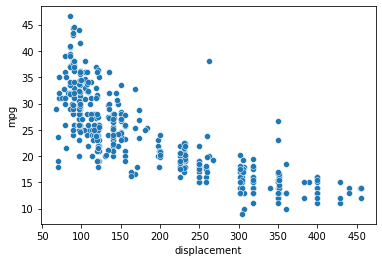

In [7]:
# mpg ~ displacement
sns.scatterplot(x='displacement', y='mpg', data=mpg)
plt.show()

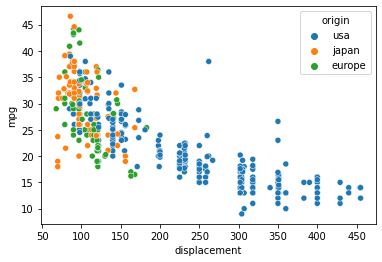

In [8]:
# 지역별로 색상을 다르게 표현
sns.scatterplot(x='displacement', y='mpg', hue='origin', data=mpg)
plt.show()

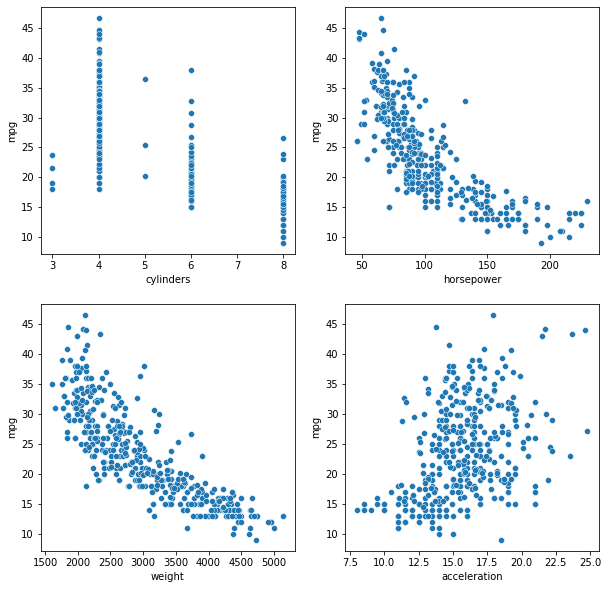

In [9]:
"""
2x2 모양의 Subplot 생성
    mpg ~ cylinders(실린더 개수)
    mpg ~ horsepower(마력)
    mpg ~ weight(무게)
    mpg ~ acceleration(가속도)
"""

fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.scatterplot(x='cylinders', y='mpg', data=mpg, ax=ax[0][0])
sns.scatterplot(x='horsepower', y='mpg', data=mpg, ax=ax[0][1])
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=ax[1][0])
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=ax[1][1])

plt.show()

In [30]:
# print(mpg.columns[[1,3,4,5]]) # fancy indexing
columns = mpg.columns[[1,3,4,5]]
for i, col in enumerate(columns):
    print(col, i)
    r_idx = i // 2
    c_idx = i % 2
    print(col, r_idx, c_idx)

cylinders 0
cylinders 0 0
horsepower 1
horsepower 0 1
weight 2
weight 1 0
acceleration 3
acceleration 1 1


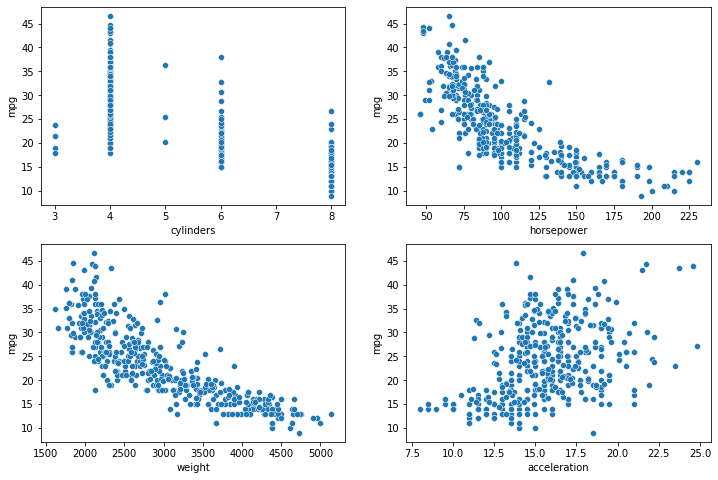

In [11]:
# scatter plot에서 x축으로 사용할 변수(column)들 : [cyl, hp, wt, ac]
columns = mpg.columns[[1,3,4,5]]

# Figure, Subplot 생성
fig, ax = plt.subplots(2, 2, figsize=(12,8))

for i, col in enumerate(columns):
    r_idx, c_idx = i // 2, i % 2
    sns.scatterplot(x=col, y='mpg', data=mpg, ax=ax[r_idx, c_idx])

plt.show()

## Countplot

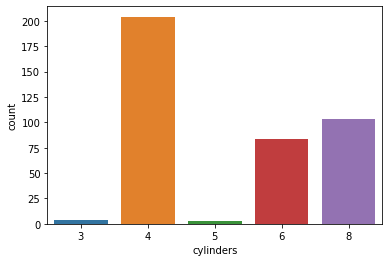

In [12]:
# cylinders 빈도수
sns.countplot(x='cylinders', data=mpg)
plt.show()

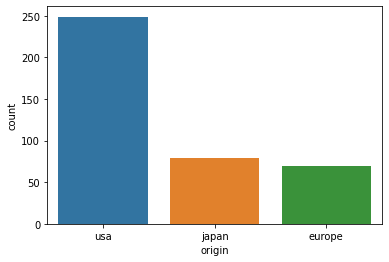

In [13]:
# origin 빈도수
sns.countplot(x='origin', data=mpg)
plt.show()

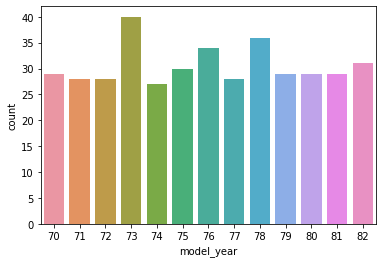

In [14]:
# model_year 빈도수
sns.countplot(x='model_year', data=mpg)
plt.show()

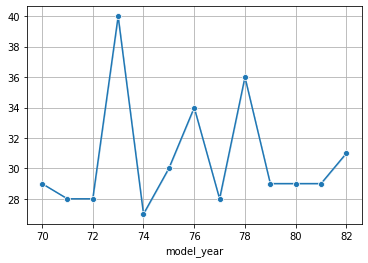

In [15]:
# 선 그래프로 그리기
sns.lineplot(x='model_year', data=mpg, estimator=np.size, marker='o')
plt.grid()
plt.show()

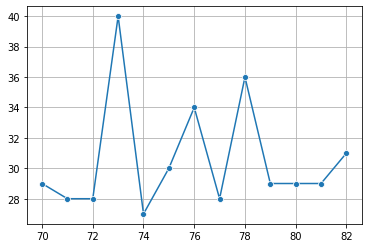

In [16]:
# Another Method
year_counts = mpg['model_year'].value_counts()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.grid()
plt.show()

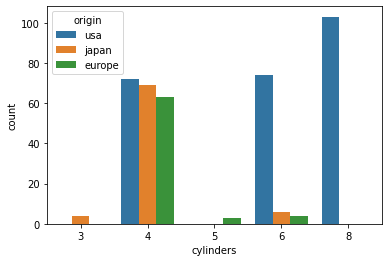

In [17]:
# origin 별, cylinders 별 빈도수
sns.countplot(x='cylinders', hue='origin', data=mpg)
plt.show()

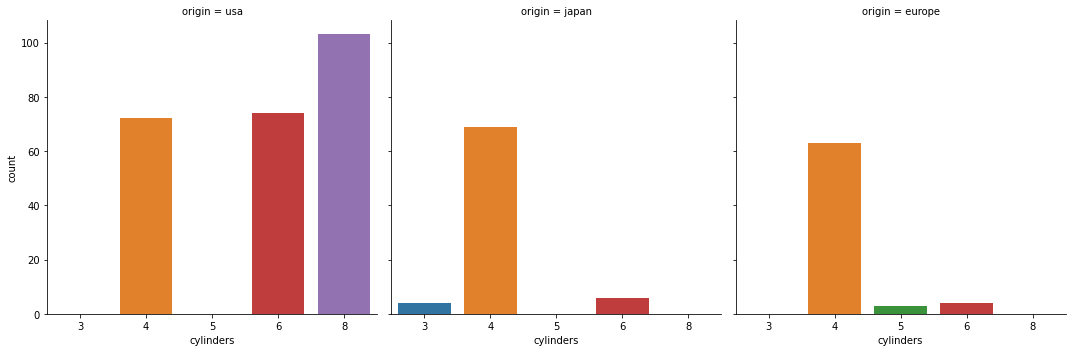

In [18]:
sns.catplot(x='cylinders', col='origin', data=mpg, kind='count')
plt.show()

## Barplot

In [19]:
# 2개의 Subplot 생성
# cylinders 별 mpg의 중앙값(median)
# origin 별 mpg의 중앙값
check = []
mpg_c = np.sort(mpg.cylinders.unique())

for x in mpg_c:
    check.append(mpg[mpg['cylinders'] == x]['mpg'].median())

for i in range(5):
    print("cylinders", mpg_c[i], ":", check[i])

check2 = []
mpg_o = mpg.origin.unique()

for y in range(3):
    print(mpg_o[y], ":", mpg[mpg['origin'] == mpg_o[y]]['mpg'].median())

cylinders 3 : 20.25
cylinders 4 : 28.25
cylinders 5 : 25.4
cylinders 6 : 19.0
cylinders 8 : 14.0
usa : 18.5
japan : 31.6
europe : 26.5


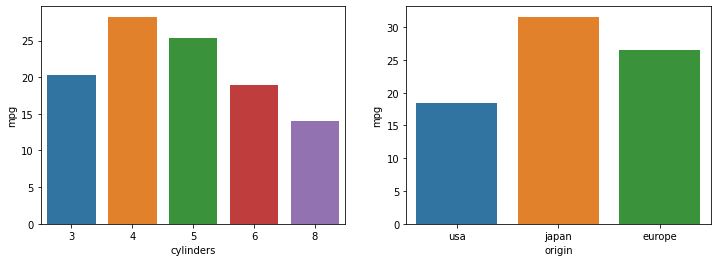

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,4))

sns.barplot(x='cylinders', y='mpg', data=mpg, estimator=np.median, ci=None, ax=ax[0])
sns.barplot(x='origin', y='mpg', data=mpg, estimator=np.median, ci=None, ax=ax[1])

# plt.subplots_adjust(wspace=0.5)
plt.show()

## Box plot

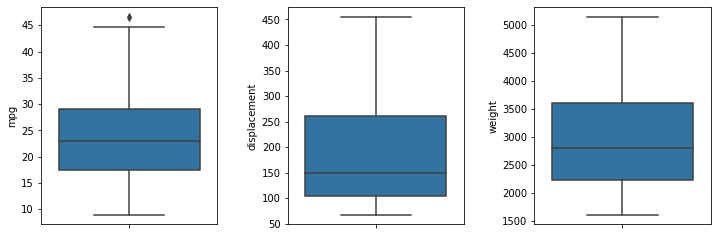

In [21]:
# 3개의 subplot을 생성
#   mpg, displacement, weight box plot

fig, ax = plt.subplots(1,3, figsize=(12,4))

#sns.boxplot(y='mpg', data=mpg, ax=ax[0])
#sns.boxplot(y='displacement', data=mpg, ax=ax[1])
#sns.boxplot(y='weight', data=mpg, ax=ax[2])

columns = mpg.columns[[0,2,4]] # [mpg, disp, wt]
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=mpg, ax=ax[i])

plt.subplots_adjust(wspace = 0.4)
plt.show()

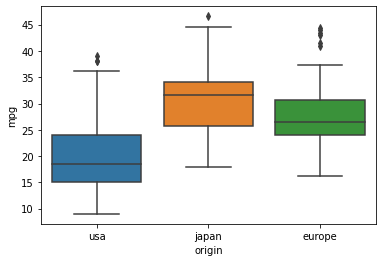

In [22]:
# origin별 mpg box plot
sns.boxplot(x='origin', y='mpg', data=mpg)
plt.show()

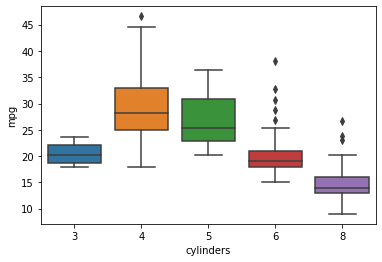

In [23]:
# cylinders별 mpg box plot
sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.show()

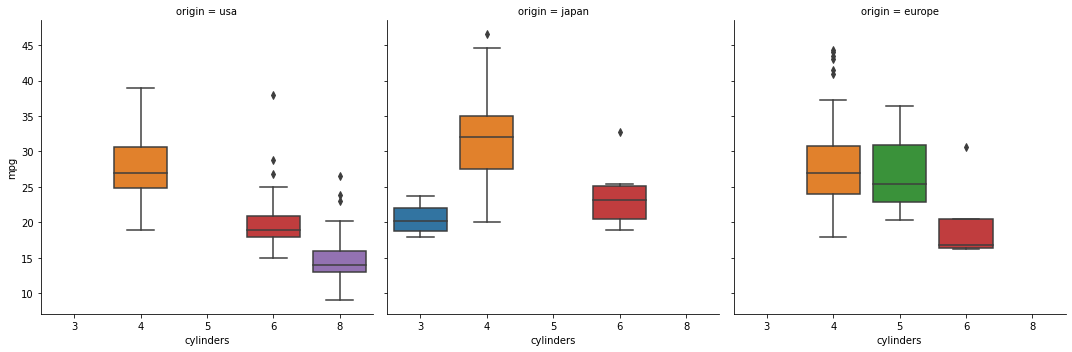

In [24]:
# origin별, cylinders별 mpg box plot
sns.catplot(x='cylinders', y='mpg', col='origin', data=mpg, kind='box')
plt.show()

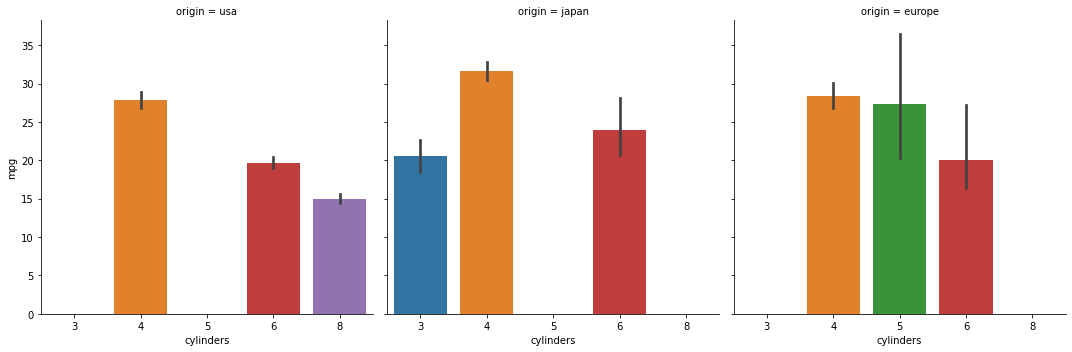

In [25]:
# origin별, cylinders별 평균 막대 그래프
sns.catplot(x='cylinders', y='mpg', col='origin', data=mpg, kind='bar')
plt.show()

## Histogram

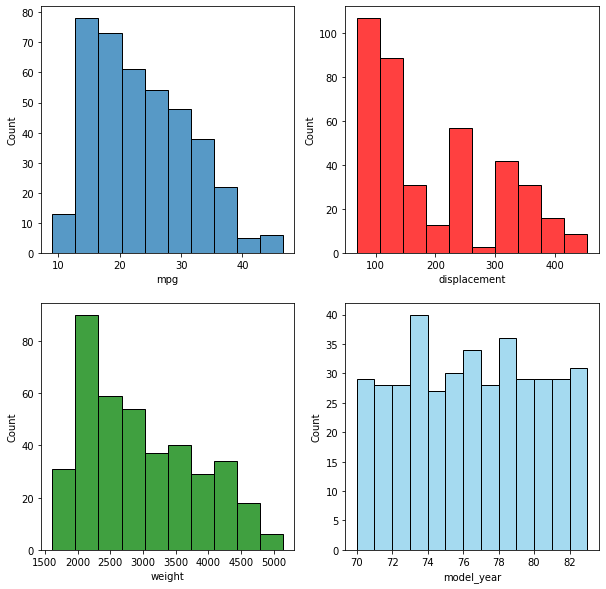

In [26]:
# 4개의 Subplot을 생성
# mpg, displacement, weight, model_year histogram
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(x='mpg', data=mpg, ax=ax[0][0], bins=10)
sns.histplot(x='displacement', data=mpg, color = 'red', ax=ax[0][1])
sns.histplot(x='weight', data=mpg, color='green', ax=ax[1][0])
sns.histplot(x='model_year', data=mpg, color='skyblue', ax=ax[1][1], bins=np.arange(70,84))
# bins=np.arange(70, 84) : countplot과 비슷한 결과

plt.show()

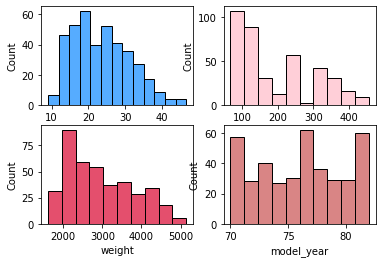

In [27]:
columns = mpg.columns[[0, 2, 4, 6]]
colors = ['dodgerblue', 'pink', 'crimson', 'indianred']

fig, ax = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(columns):
    r_idx, c_idx = i // 2, i % 2
    sns.histplot(data=mpg, x=col, ax=ax[r_idx, c_idx], color=colors[i])

plt.show()

## Pair plot

In [28]:
mpg_df = mpg
mpg_df = mpg_df.drop(['name'], axis='columns') # 'name' 열 삭제
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

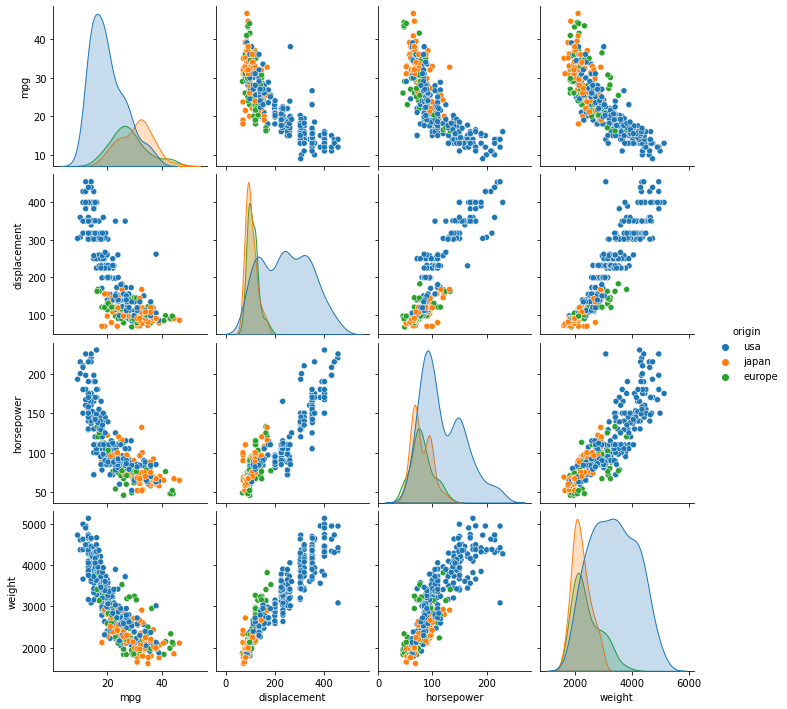

In [29]:
sns.pairplot(mpg_df, hue='origin', vars=['mpg', 'displacement', 'horsepower', 'weight'])
plt.show()